# EDA of Heart Disease Data Set

In [296]:
# Import libraries to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from sklearn.preprocessing import OneHotEncoder

In [297]:
# Define a random state value
RANDOM_STATE = 3030

### Load the different datasets into one dataframe

In [298]:
# Define column names which will be used instead of the ones in the datasets.
column_names = [
    "age", "sex", "chest_pain_type", "rest_bp", "cholesterol",
    "fasting_bs", "resting_ecg", "max_hr", "exercise_angina", "st_exercise_depression",
    "st_exercise_slope", "major_vessels_fluorospy", "thal", "angiographic_disease"
]
na_values = ["?"] # Define what values will be interpreted as missing values, in this dataset the "?" character is used for this.

# Load all datasets using relative paths and combine into one dataframe.
df = pd.concat([
    pd.read_csv("../../data/processed.cleveland.data", names=column_names, na_values=na_values),
    pd.read_csv("../../data/processed.hungarian.data", names=column_names, na_values=na_values),
    pd.read_csv("../../data/processed.switzerland.data", names=column_names, na_values=na_values),
    pd.read_csv("../../data/processed.va.data", names=column_names, na_values=na_values)
])
df.sample(random_state=RANDOM_STATE, n=10)

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,st_exercise_depression,st_exercise_slope,major_vessels_fluorospy,thal,angiographic_disease
10,34.0,1.0,2.0,150.0,214.0,0.0,1.0,168.0,0.0,0.0,NaN,NaN,NaN,0
236,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2
112,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
152,54.0,1.0,2.0,160.0,305.0,0.0,0.0,175.0,0.0,0.0,NaN,NaN,NaN,0
212,50.0,0.0,3.0,140.0,288.0,0.0,0.0,140.0,1.0,0.0,NaN,NaN,7.0,1
113,72.0,1.0,4.0,NaN,211.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
90,61.0,1.0,4.0,150.0,0.0,0.0,0.0,117.0,1.0,2.0,2.0,NaN,7.0,2
188,74.0,1.0,4.0,155.0,310.0,0.0,0.0,112.0,1.0,1.5,3.0,NaN,NaN,2
213,66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3


Shape of combined dataset

In [299]:
df.shape

(920, 14)

### Some simple preprocessing

There is discrepancy between the four datasets. Some of the datasets have a angiographic_disease value of 0-4, and some only have 0 and 1. As discussed, we want to only use 0 and 1. Therefore we convert all values above 1 to 1.

In [300]:
df["angiographic_disease"].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: angiographic_disease, dtype: int64

In [301]:
df[df["angiographic_disease"] > 1] = 1

Convert value types

In [302]:
# By default, all continuous values are interpreted as floats.
# Therefore, we convert all values from float to integer, except for st_exercise_depression (index #9), which actually is a float in the datasets.
#for index, name in enumerate(column_names):
    #if name != column_names[9]:
        #df[name] = df[name].astype("Int64")

# Set category attributes
df["sex"] = df["sex"].astype("category")
df["chest_pain_type"] = df["chest_pain_type"].astype("category")
df["fasting_bs"] = df["fasting_bs"].astype("category")
df["resting_ecg"] = df["resting_ecg"].astype("category")
df["exercise_angina"] = df["exercise_angina"].astype("category")
df["st_exercise_slope"] = df["st_exercise_slope"].astype("category")
df["thal"] = df["thal"].astype("category")
df["angiographic_disease"] = df["angiographic_disease"].astype("category")

The datatypes after convertion

In [303]:
df.dtypes

age                         float64
sex                        category
chest_pain_type            category
rest_bp                     float64
cholesterol                 float64
fasting_bs                 category
resting_ecg                category
max_hr                      float64
exercise_angina            category
st_exercise_depression      float64
st_exercise_slope          category
major_vessels_fluorospy     float64
thal                       category
angiographic_disease       category
dtype: object

Checking the new values of the target feature (angiographic_disease) reveals a rather equal class distribution.

In [304]:
df["angiographic_disease"].value_counts()

1    509
0    411
Name: angiographic_disease, dtype: int64

A sample of the dataset after preprocessing

In [305]:
df.sample(random_state=RANDOM_STATE, n=10)

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,st_exercise_depression,st_exercise_slope,major_vessels_fluorospy,thal,angiographic_disease
10,34.0,1.0,2.0,150.0,214.0,0.0,1.0,168.0,0.0,0.0,NaN,NaN,NaN,0
236,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
112,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
152,54.0,1.0,2.0,160.0,305.0,0.0,0.0,175.0,0.0,0.0,NaN,NaN,NaN,0
212,50.0,0.0,3.0,140.0,288.0,0.0,0.0,140.0,1.0,0.0,NaN,NaN,7.0,1
113,72.0,1.0,4.0,NaN,211.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
188,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
213,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


### Data description

Describe the numeric data

In [306]:
df.describe()

,age,rest_bp,cholesterol,max_hr,st_exercise_depression,major_vessels_fluorospy
count,920.000000,887.000000,894.000000,887.000000,884.000000,467.000000
mean,38.265217,95.288613,156.553691,103.095829,0.743665,0.713062
std,23.769689,60.131685,127.414082,66.445066,0.782086,0.588791
min,1.000000,1.000000,0.000000,1.000000,-2.600000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,47.000000,120.000000,203.000000,128.000000,1.000000,1.000000
75%,56.000000,138.000000,253.000000,154.000000,1.000000,1.000000
max,76.000000,200.000000,603.000000,202.000000,5.000000,3.000000


Describe the categorical data

In [307]:
df.describe(include="category")

,sex,chest_pain_type,fasting_bs,resting_ecg,exercise_angina,st_exercise_slope,thal,angiographic_disease
count,920.0,920.0,866.0,918.0,887.0,660.0,537.0,920
unique,2.0,4.0,2.0,3.0,2.0,3.0,4.0,2
top,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1
freq,746.0,301.0,539.0,438.0,444.0,408.0,244.0,509


Number of missing values per attribute

In [308]:
df.isna().sum()

age                          0
sex                          0
chest_pain_type              0
rest_bp                     33
cholesterol                 26
fasting_bs                  54
resting_ecg                  2
max_hr                      33
exercise_angina             33
st_exercise_depression      36
st_exercise_slope          260
major_vessels_fluorospy    453
thal                       383
angiographic_disease         0
dtype: int64

To what extent, in percent, are the features missing?

In [309]:
(df.isnull().sum() / df.shape[0]) * 100

age                         0.000000
sex                         0.000000
chest_pain_type             0.000000
rest_bp                     3.586957
cholesterol                 2.826087
fasting_bs                  5.869565
resting_ecg                 0.217391
max_hr                      3.586957
exercise_angina             3.586957
st_exercise_depression      3.913043
st_exercise_slope          28.260870
major_vessels_fluorospy    49.239130
thal                       41.630435
angiographic_disease        0.000000
dtype: float64

### Data visualization

Plot distribution of all features

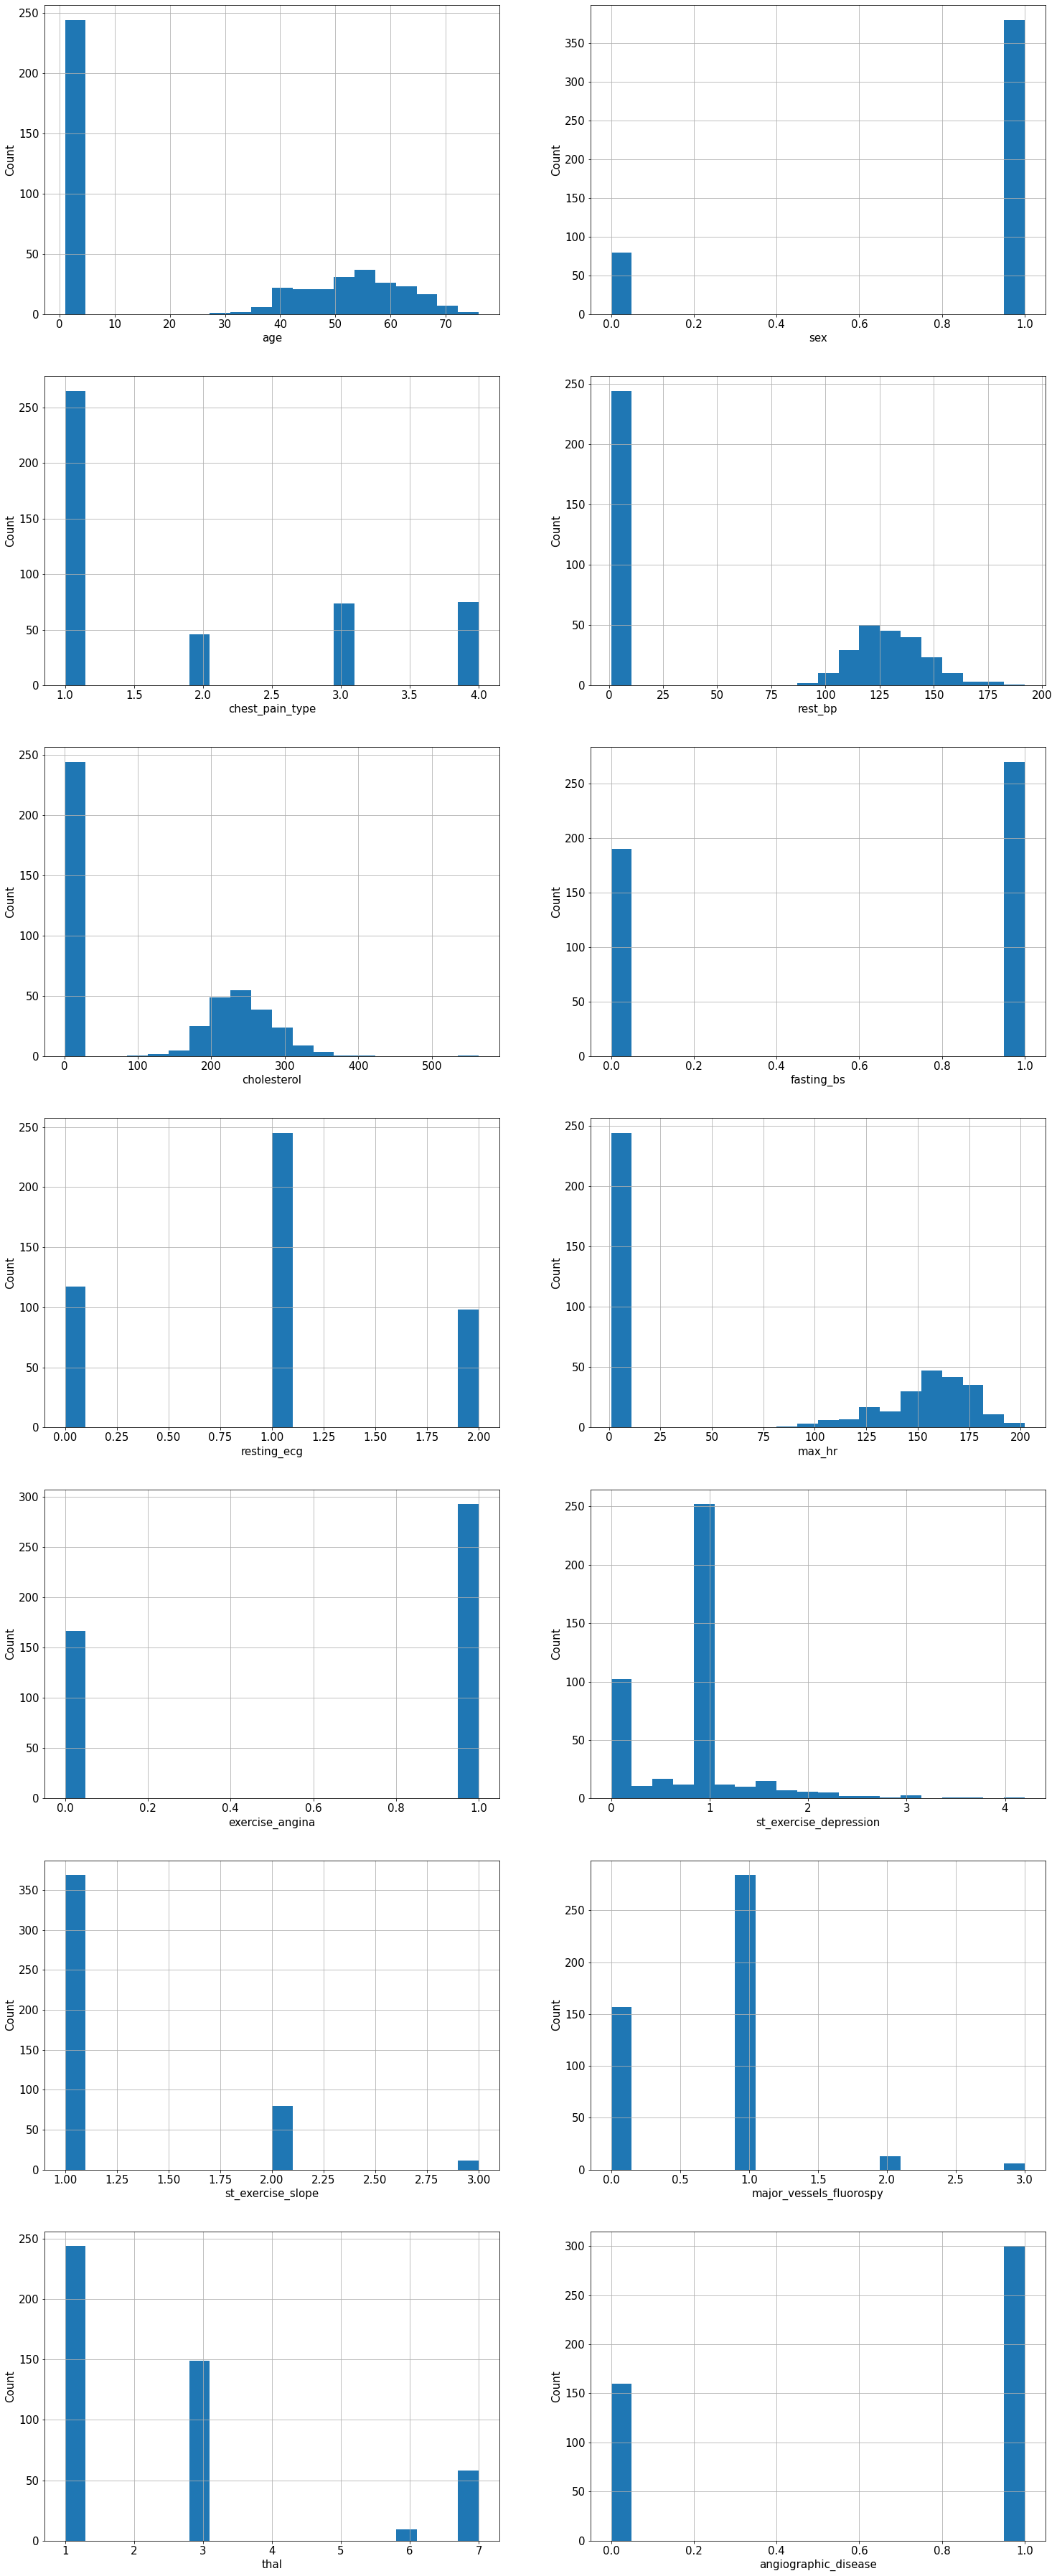

In [310]:
plt.rcParams.update({'font.size': 15})
df_no_na = df.dropna(inplace=False)
plt.figure(figsize=(25,65))
for index, feature in enumerate(df_no_na.columns):
    plt.subplot(7, 2, index+1)
    plt.hist(df_no_na[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid()

# Preprocessing

## Input missing values

In [311]:
len(df)

920

In [312]:
df['age'].fillna((df['age'].mean()), inplace=True)
df['rest_bp'].fillna((df['rest_bp'].mean()), inplace=True)
df['cholesterol'].fillna((df['cholesterol'].mean()), inplace=True)
df['max_hr'].fillna((df['max_hr'].mean()), inplace=True)
df['st_exercise_depression'].fillna((df['st_exercise_depression'].mean()), inplace=True)
df['major_vessels_fluorospy'].fillna((df['major_vessels_fluorospy'].mean()), inplace=True)

There are categorical values that have too much missing data. Thus, those columns that have more than 10% of the data missing will be dropped from the dataset.

In [313]:
df = df.drop(['st_exercise_slope', 'major_vessels_fluorospy', 'thal'], axis=1)
df

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,st_exercise_depression,angiographic_disease
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.0,2.300000,0
1,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.0,2.600000,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.0,3.500000,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.0,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.0,0.000000,1
196,62.0,1.0,1.0,95.288613,139.0,0.0,1.0,103.095829,NaN,0.743665,0
197,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1
198,58.0,1.0,4.0,95.288613,385.0,1.0,2.0,103.095829,NaN,0.743665,0


The rest of the values of categorical features were input with the most occurent value in each column

In [314]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,st_exercise_depression,angiographic_disease
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.0,2.300000,0
1,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.0,2.600000,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.0,3.500000,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.0,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.0,0.000000,1
196,62.0,1.0,1.0,95.288613,139.0,0.0,1.0,103.095829,1.0,0.743665,0
197,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1
198,58.0,1.0,4.0,95.288613,385.0,1.0,2.0,103.095829,1.0,0.743665,0


We normalize the data so that all numerical values are between -1 and 1, so that the different value ranges do not affect the performance of the different algorithms that will be tested

In [315]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
columns = ['age', 'rest_bp', 'cholesterol', 'max_hr','st_exercise_depression']
for col in columns:
    df[col] = min_max_scaling(df[col])
df.head()

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,st_exercise_depression,angiographic_disease
0,0.826667,1.0,1.0,0.723618,0.386401,1.0,2.0,0.741294,0.0,0.644737,0
1,0.000000,1.0,1.0,0.000000,0.001658,1.0,1.0,0.000000,1.0,0.473684,1
2,0.880000,1.0,4.0,0.597990,0.379768,0.0,2.0,0.636816,1.0,0.684211,1
3,0.480000,1.0,3.0,0.648241,0.414594,0.0,0.0,0.925373,0.0,0.802632,0
4,0.533333,0.0,2.0,0.648241,0.338308,0.0,2.0,0.850746,0.0,0.526316,0


#### One-hot encoding

The nominal features are `chest_pain_type`, `resting_ecg`, `st_exercise_slope`, and `thal`, but only `chest_pain_type` and `resting_ecg` are left after preprocessing, so these are converted with one-hot encoding.

In [316]:
df["chest_pain_type"] = df["chest_pain_type"].map({1.0: "typical_angina", 2.0: "atypical_angina", 3.0: "non_angingal_pain", 4.0: "asymptomatic"})
df["resting_ecg"] = df["resting_ecg"].map({0.0: "resting_ecg_normal", 1.0: "resting_ecg_stt_abnormal", 2.0: "resting_ecg_left_ventricular_hypertrophy"})

ohe_chest_pain = pd.get_dummies(df["chest_pain_type"])
ohe_resting_ecg = pd.get_dummies(df["resting_ecg"])

df = pd.concat([df, ohe_chest_pain, ohe_resting_ecg], axis=1)
df.drop(["chest_pain_type"], axis=1, inplace=True)
df.drop(["resting_ecg"], axis=1, inplace=True)

Shape of dataset after preprocessing

In [317]:
df.shape

(920, 16)

Sample of dataset after final preprocessing

In [318]:
df.sample(random_state=RANDOM_STATE, n=10)

,age,sex,rest_bp,cholesterol,fasting_bs,max_hr,exercise_angina,st_exercise_depression,angiographic_disease,typical_angina,atypical_angina,non_angingal_pain,asymptomatic,resting_ecg_normal,resting_ecg_stt_abnormal,resting_ecg_left_ventricular_hypertrophy
10,0.440000,1.0,0.748744,0.354892,0.0,0.830846,0.0,0.342105,0,0,1,0,0,0,1,0
236,0.000000,1.0,0.000000,0.001658,1.0,0.000000,1.0,0.473684,1,1,0,0,0,0,1,0
112,0.680000,1.0,0.587940,0.308458,0.0,0.940299,0.0,0.342105,0,1,0,0,0,0,0,1
287,0.760000,1.0,0.623116,0.364842,0.0,0.711443,0.0,0.394737,0,0,1,0,0,1,0,0
152,0.706667,1.0,0.798995,0.505804,0.0,0.865672,0.0,0.342105,0,0,1,0,0,1,0,0
212,0.653333,0.0,0.698492,0.477612,0.0,0.691542,1.0,0.342105,1,0,0,1,0,1,0,0
113,0.946667,1.0,0.473812,0.349917,0.0,0.507939,1.0,0.439956,1,0,0,0,1,1,0,0
90,0.000000,1.0,0.000000,0.001658,1.0,0.000000,1.0,0.473684,1,1,0,0,0,0,1,0
188,0.000000,1.0,0.000000,0.001658,1.0,0.000000,1.0,0.473684,1,1,0,0,0,0,1,0
213,0.000000,1.0,0.000000,0.001658,1.0,0.000000,1.0,0.473684,1,1,0,0,0,0,1,0
